In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from math import sqrt, exp
from numpy.random import randn
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]

In [3]:
X, Y = shuffle(X, Y, random_state = 371)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
def He_WeightInit(prevNodes,curNodes):
    std = sqrt(2.0/prevNodes)
    W = []
    for i in range(0,curNodes):
        wi = randn(prevNodes)
        wi = wi * std
        W.append(wi)
    W = np.array(W)
    return W

def LeakyReLU(x):
    return max(x,0.01*x);

def LeakyReLUderiv(x):
    if(x >= 0):
        return 1
    return 0.01

def Identity(x):
    return x

def IdentityDeriv(x):
    return 1

def Init_Bias(n):
    b = [0.01 for i in range(0,n)]
    b = np.array(b)
    return b.reshape(-1,1)

In [5]:
def BuildNeuralNetwork(X, Y, HiddenLayers, OutputLayer, Iterations, LearningRate):
    InitialDim = len(X[0])
    W = []
    W.append([])
    B = []
    B.append([])
    for i in range(0, len(HiddenLayers)):
        if (i == 0):
            W.append(He_WeightInit(InitialDim, HiddenLayers[i]))
        else:
            W.append(He_WeightInit(HiddenLayers[i-1], HiddenLayers[i]))
        B.append(Init_Bias(HiddenLayers[i]))
    W.append(He_WeightInit(HiddenLayers[len(HiddenLayers)-1], OutputLayer))
    B.append(Init_Bias(OutputLayer))
    lReLU = np.vectorize(LeakyReLU)
    lReLUderiv = np.vectorize(LeakyReLUderiv)
    Idt = np.vectorize(Identity)
    idtderiv = np.vectorize(IdentityDeriv)
    scores = []
    iteration = []
    for iter in range(1, Iterations+1):
        ypredict = []
        dW = [np.zeros_like(w) for w in W]
        dB = [np.zeros_like(b) for b in B]
        for dataidx in range(0, len(X)):
            # Forward Propagation
            x = X[dataidx].reshape(-1, 1)
            Z = []
            A = []
            Z.append(x)
            A.append(x)
            for layer in range(1, len(W)):
                Wi = W[layer]
                Zi = np.add(np.dot(Wi, x), B[layer])
                Z.append(Zi)
                if layer == (len(W) - 1):
                    Ai = Idt(Zi)
                else:
                    Ai = lReLU(Zi)
                A.append(Ai)
                x = Ai
            ypredict.append(x[0])

            # Back Propagation
            dZ = np.subtract(x, Y[dataidx])
            for layer in range(len(W) - 1, 0, -1):
                dW[layer] += np.dot(dZ, A[layer - 1].T)
                dB[layer] += dZ
                if layer > 1:
                    dZ = np.dot(W[layer].T, dZ) * lReLUderiv(Z[layer - 1])

        # Weight & Bias Adjustment
        for layer in range(1, len(W)):
            W[layer] -= LearningRate * (dW[layer] / len(X))
            B[layer] -= LearningRate * (dB[layer] / len(X))

        # Calculating Metrics
        ypredict = np.array(ypredict)
        scores.append(r2_score(Y, ypredict))
        iteration.append(iter)
        if (iter % 10) == 0:
            print("Iteration (" + str(iter) + "): Accuracy = " + str(scores[len(scores)-1]) + ", Loss = " + str(mean_squared_error(Y, ypredict)))
    plt.plot(iteration, scores, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=2)
    plt.xlabel('Iteration')
    plt.ylabel('Score')
    return W, B


Iteration (10): Accuracy = 0.29288184716344823, Loss = 59.69460061242933
Iteration (20): Accuracy = 0.4626824510593909, Loss = 45.360108996484975
Iteration (30): Accuracy = 0.573393268589157, Loss = 36.01395091893589
Iteration (40): Accuracy = 0.6471693444547759, Loss = 29.78580733941675
Iteration (50): Accuracy = 0.7005706846826598, Loss = 25.277689899234392
Iteration (60): Accuracy = 0.7310296873013056, Loss = 22.706354417208836
Iteration (70): Accuracy = 0.7540596556385027, Loss = 20.76217471189211
Iteration (80): Accuracy = 0.7657318680153693, Loss = 19.776811723676534
Iteration (90): Accuracy = 0.7774668444090129, Loss = 18.78615022502206
Iteration (100): Accuracy = 0.7918787719517371, Loss = 17.56950169851046
Iteration (110): Accuracy = 0.8025946300667463, Loss = 16.664873712608948
Iteration (120): Accuracy = 0.8126707635944244, Loss = 15.814250992432102
Iteration (130): Accuracy = 0.8220231182652584, Loss = 15.024729362105246
Iteration (140): Accuracy = 0.8295366867972447, Loss 

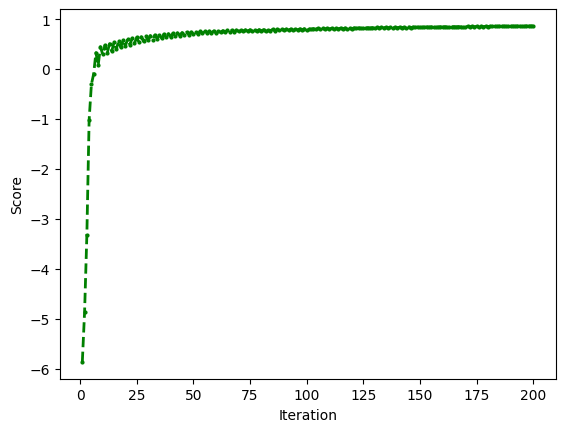

In [6]:
W, B = BuildNeuralNetwork(X,Y,[9,9],1,200,0.01)